In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer

In [45]:
#load dataset 
df_16=pd.read_excel("3960_2016.xlsx")
df_16.head()

,Neighbourhood Name,Neighbourhood Number,Descriptive Name,Latitude,Longitude,Occurrence Violation Type Group,Occurrence Reported Month,Occurrence Reported Year,Occurrence Reported Quarter,Number of Occurrences,...,Employment_No Response,"Income_Less than $30,","Income_$30,000 to les","Income_$60,000 to les","Income_$100,000 to le","Income_$125,000 to le","Income_$150,000 to le","Income_$200,000 to le","Income_$250,000 or mo",Income_No Response
0,ABBOTTSFIELD,2010,Abbottsfield,53.574143,-113.388758,Assault,7,2016,Q3,4,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
1,ABBOTTSFIELD,2010,Abbottsfield,53.574143,-113.388758,Theft From Vehicle,9,2016,Q3,1,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
2,ABBOTTSFIELD,2010,Abbottsfield,53.574143,-113.388758,Theft From Vehicle,1,2016,Q1,1,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
3,ABBOTTSFIELD,2010,Abbottsfield,53.574143,-113.388758,Assault,11,2016,Q4,1,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
4,ABBOTTSFIELD,2010,Abbottsfield,53.574143,-113.388758,Assault,6,2016,Q2,1,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0


In [46]:
#checking info 
df_16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11132 entries, 0 to 11131
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Neighbourhood Name               11132 non-null  object        
 1   Neighbourhood Number             11132 non-null  int64         
 2   Descriptive Name                 11132 non-null  object        
 3   Latitude                         11132 non-null  float64       
 4   Longitude                        11132 non-null  float64       
 5   Occurrence Violation Type Group  11132 non-null  object        
 6   Occurrence Reported Month        11132 non-null  int64         
 7   Occurrence Reported Year         11132 non-null  int64         
 8   Occurrence Reported Quarter      11132 non-null  object        
 9   Number of Occurrences            11132 non-null  int64         
 10  Month-Year                       11132 non-null  datetime6

In [47]:
#dropping unnecessary columns
df_16.drop(['Descriptive Name'], axis=1, inplace =True)
#df_16.drop(['Unnamed: 0'], axis=1, inplace =True)
df_16.drop(['Air Temp. Avg. Max. (°C)'], axis=1, inplace =True)
df_16.drop(['Air Temp. Avg. Min. (°C)'], axis=1, inplace =True)
df_16.drop(['Neighbourhood Number'], axis=1, inplace =True)
df_16.drop(['Month-Year'], axis=1, inplace =True)
df_16.drop(['Month-Year.1'], axis=1, inplace =True)
df_16.rename(columns={'Occurrence Reported Quarter': 'QRT', 'Number of Occurrences':'Sum_Occurrences'}, inplace=True)
df_16.rename(columns={'Occurrence Violation Type Group': 'Violation_Type', 'Occurrence Reported Month':'Reported_Month', 'Occurrence Reported Year':'Reported_Year'}, inplace=True)
df_16.rename(columns={'Edu_Preschool': 'Preschool', 'Edu_Kindergarten ':'Kindergarten', 'Edu_Gr.7 - Gr.9':'Gr7_Gr9'}, inplace=True)
df_16.rename(columns={'Edu_Gr.10 - Gr.12': 'Gr10_Gr12', 'Edu_Post Secondar':'Post_Secondary'}, inplace=True)
df_16.head()

,Neighbourhood Name,Latitude,Longitude,Violation_Type,Reported_Month,Reported_Year,QRT,Sum_Occurrences,Preschool,Kindergarten,...,Employment_No Response,"Income_Less than $30,","Income_$30,000 to les","Income_$60,000 to les","Income_$100,000 to le","Income_$125,000 to le","Income_$150,000 to le","Income_$200,000 to le","Income_$250,000 or mo",Income_No Response
0,ABBOTTSFIELD,53.574143,-113.388758,Assault,7,2016,Q3,4,159.0,189.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
1,ABBOTTSFIELD,53.574143,-113.388758,Theft From Vehicle,9,2016,Q3,1,159.0,189.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
2,ABBOTTSFIELD,53.574143,-113.388758,Theft From Vehicle,1,2016,Q1,1,159.0,189.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
3,ABBOTTSFIELD,53.574143,-113.388758,Assault,11,2016,Q4,1,159.0,189.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
4,ABBOTTSFIELD,53.574143,-113.388758,Assault,6,2016,Q2,1,159.0,189.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0


In [48]:
# Convert the Numerical Months to String Months in 'Occurrence Reported Month'
month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
               6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October',
               11: 'November', 12: 'December'}

# use the loc accessor to replace month_num column with corresponding month names
df_16['Reported_Month'] = df_16['Reported_Month'].map(month_names)

df_16.head()

,Neighbourhood Name,Latitude,Longitude,Violation_Type,Reported_Month,Reported_Year,QRT,Sum_Occurrences,Preschool,Kindergarten,...,Employment_No Response,"Income_Less than $30,","Income_$30,000 to les","Income_$60,000 to les","Income_$100,000 to le","Income_$125,000 to le","Income_$150,000 to le","Income_$200,000 to le","Income_$250,000 or mo",Income_No Response
0,ABBOTTSFIELD,53.574143,-113.388758,Assault,July,2016,Q3,4,159.0,189.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
1,ABBOTTSFIELD,53.574143,-113.388758,Theft From Vehicle,September,2016,Q3,1,159.0,189.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
2,ABBOTTSFIELD,53.574143,-113.388758,Theft From Vehicle,January,2016,Q1,1,159.0,189.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
3,ABBOTTSFIELD,53.574143,-113.388758,Assault,November,2016,Q4,1,159.0,189.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
4,ABBOTTSFIELD,53.574143,-113.388758,Assault,June,2016,Q2,1,159.0,189.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0


In [49]:
# Drop all rows corresponding to the null values
df_16=df_16.dropna(how='any', axis=0)

In [50]:
# Double check to see if they are dropped.
df_16.isnull().sum()

Neighbourhood Name        0
Latitude                  0
Longitude                 0
Violation_Type            0
Reported_Month            0
Reported_Year             0
QRT                       0
Sum_Occurrences           0
Preschool                 0
Kindergarten              0
Gr7_Gr9                   0
Gr10_Gr12                 0
Post_Secondary            0
Homemaker                 0
Employedage0-30           0
Employed 30+              0
Unemployed                0
Retired                   0
Permanently U             0
Employment_No Response    0
Income_Less than $30,     0
Income_$30,000 to les     0
Income_$60,000 to les     0
Income_$100,000 to le     0
Income_$125,000 to le     0
Income_$150,000 to le     0
Income_$200,000 to le     0
Income_$250,000 or mo     0
Income_No Response        0
dtype: int64

In [51]:
# filtering violent crimes into another dataframe
df_violent = df_16[df_16['Violation_Type'].isin(['Assault','Robbery','Sexual Assaults','Homicide'])]

In [52]:
df_violent.head()

,Neighbourhood Name,Latitude,Longitude,Violation_Type,Reported_Month,Reported_Year,QRT,Sum_Occurrences,Preschool,Kindergarten,...,Employment_No Response,"Income_Less than $30,","Income_$30,000 to les","Income_$60,000 to les","Income_$100,000 to le","Income_$125,000 to le","Income_$150,000 to le","Income_$200,000 to le","Income_$250,000 or mo",Income_No Response
0,ABBOTTSFIELD,53.574143,-113.388758,Assault,July,2016,Q3,4,159.0,189.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
3,ABBOTTSFIELD,53.574143,-113.388758,Assault,November,2016,Q4,1,159.0,189.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
4,ABBOTTSFIELD,53.574143,-113.388758,Assault,June,2016,Q2,1,159.0,189.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
18,ABBOTTSFIELD,53.574143,-113.388758,Assault,April,2016,Q2,2,159.0,189.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0
19,ABBOTTSFIELD,53.574143,-113.388758,Assault,October,2016,Q4,2,159.0,189.0,...,499.0,206.0,170.0,79.0,23.0,4.0,3.0,3.0,2.0,195.0


## Violent Crimes
Taking in account only violent crime but model can be extended to add any crime type.

In [53]:
df_violent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3217 entries, 0 to 11129
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Neighbourhood Name      3217 non-null   object 
 1   Latitude                3217 non-null   float64
 2   Longitude               3217 non-null   float64
 3   Violation_Type          3217 non-null   object 
 4   Reported_Month          3217 non-null   object 
 5   Reported_Year           3217 non-null   int64  
 6   QRT                     3217 non-null   object 
 7   Sum_Occurrences         3217 non-null   int64  
 8   Preschool               3217 non-null   float64
 9   Kindergarten            3217 non-null   float64
 10  Gr7_Gr9                 3217 non-null   float64
 11  Gr10_Gr12               3217 non-null   float64
 12  Post_Secondary          3217 non-null   float64
 13  Homemaker               3217 non-null   float64
 14  Employedage0-30         3217 non-null  

In [54]:
df_violent.duplicated().any()

False

In [55]:
#Data split and categorical and numerical features
y= df_violent["Sum_Occurrences"]
X = df_violent.drop(columns={"Sum_Occurrences"})
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)
numeric_features = ['Preschool', 'Kindergarten','Gr7_Gr9', 'Gr10_Gr12', 'Post_Secondary','Homemaker', 'Employedage0-30', 'Employed 30+ ', 
'Unemployed',
 'Retired', 'Permanently U', 'Employment_No Response',
       'Income_Less than $30,', 'Income_$30,000 to les',
       'Income_$60,000 to les', 'Income_$100,000 to le',
       'Income_$125,000 to le', 'Income_$150,000 to le',
       'Income_$200,000 to le', 'Income_$250,000 or mo', 'Income_No Response']
numeric_transformer = Pipeline( steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())])

categorical_features =['Violation_Type','Reported_Month','Reported_Year','Neighbourhood Name']
categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")),("encoder", OneHotEncoder(handle_unknown="ignore"))])
preprocessor = ColumnTransformer( remainder='drop',
        transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features) ])

##  Defining models & Evaluating accuraccy using R2

In [56]:
# Define the models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Elastic Net', ElasticNet(max_iter=7600)),
    ('Random Forest', RandomForestRegressor()),
    ('SGD', SGDRegressor(max_iter=7500)),
    ('Extra Trees', ExtraTreesRegressor()),
    ('XGBoost', XGBRegressor(objective='reg:squarederror')),
    ('Gradient Boosting', GradientBoostingRegressor()),
]

# Evaluate models with r2
for name, model in models:
    pipe = Pipeline([
        ('preprocessing', preprocessor),
        ('model',model)
    ])
    pipe.fit(X_train, y_train)
    print("Training scores: ", name, pipe.score(X_train,y_train))
    print("Testing Score: ",name,  pipe.score(X_test,y_test))

Training scores:  Linear Regression 0.5381614930805529
Testing Score:  Linear Regression 0.26332653815097684
Training scores:  Elastic Net 0.15966303070498866
Testing Score:  Elastic Net 0.14975336379961135
Training scores:  Random Forest 0.9790577887165118
Testing Score:  Random Forest 0.6440735339446714
Training scores:  SGD 0.4913531727448681
Testing Score:  SGD 0.2784021308578575
Training scores:  Extra Trees 1.0
Testing Score:  Extra Trees 0.6202641018725439
Training scores:  XGBoost 0.9606920250540636
Testing Score:  XGBoost 0.6784921922515138
Training scores:  Gradient Boosting 0.8874355520689791
Testing Score:  Gradient Boosting 0.6746918348017965


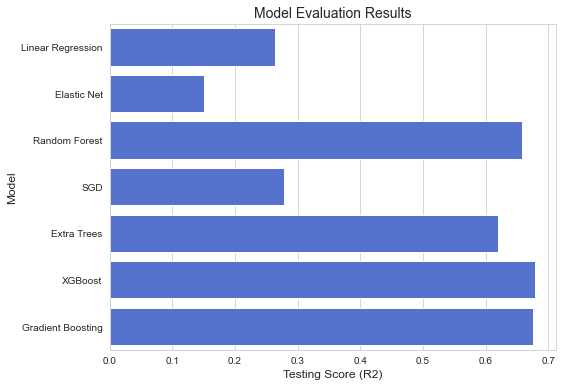

In [57]:


# Define the models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Elastic Net', ElasticNet(max_iter=7600)),
    ('Random Forest', RandomForestRegressor()),
    ('SGD', SGDRegressor(max_iter=7500)),
    ('Extra Trees', ExtraTreesRegressor()),
    ('XGBoost', XGBRegressor(objective='reg:squarederror')),
    ('Gradient Boosting', GradientBoostingRegressor()),
]
# Evaluate models with r2
test_scores = []
model_names = []
for name, model in models:
    pipe = Pipeline([
        ('preprocessing', preprocessor),
        ('model',model)
    ])
    pipe.fit(X_train, y_train)
    test_score = pipe.score(X_test,y_test)
    test_scores.append(test_score)
    model_names.append(name)

# Create horizontal bar chart to display testing scores
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.barplot(x=test_scores, y=model_names, color='royalblue')

# Add labels and title
plt.xlabel('Testing Score (R2)', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.title('Model Evaluation Results', fontsize=14)

# Show chart
plt.show()


## optimizing best 3 models using Gridsearch Cv

In [58]:
#optimizing best model-- random forest regressor

# Define the best model pipeline
best_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor())])
# Define the grid of hyperparameters to search over
param_grid = {'model__bootstrap': [True,False],
    #'model__max_depth': [80, 90, 100, 110],
    'model__max_features': ['sqrt'],
    'model__min_samples_leaf': [2,3,4],
    #'model__min_samples_split': [3,4,5],
    'model__n_estimators': [250,500]
    }
# Define the transformed target regressor with grid search pipeline
best_grid_search_pipeline = GridSearchCV((best_pipeline),param_grid=param_grid, cv=5, n_jobs=-1, 
                                                                                             scoring='r2')
# Train the model
best_grid_search_pipeline.fit(X_train, y_train.ravel())
# Evaluate the model on the test set
testscore = best_grid_search_pipeline.score(X_test, y_test.ravel())
trainscore= best_grid_search_pipeline.score(X_train, y_train.ravel())
print(f"Test score: {testscore:.3f}")
print(f"Train score:{trainscore:.3f}")
y_pred = best_grid_search_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Test RMSE:', rmse)


Test score: 0.567
Train score:0.815
Test RMSE: 1.670166424061408


In [59]:
#parameters tuned --random forest regressor
best_grid_search_pipeline.best_params_

{'model__bootstrap': False,
 'model__max_features': 'sqrt',
 'model__min_samples_leaf': 2,
 'model__n_estimators': 500}

In [60]:
#optimizing best model-- Gradient boosting

# Define the best model pipeline
best_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', GradientBoostingRegressor())])
# Define the grid of hyperparameters to search over
param_grid = param_grid = {
    #'model__min_samples_leaf': [2,3,4],
    #'model__min_samples_split': [3,5,6],
    'model__max_features': ['sqrt', 'log2'],
    "model__n_estimators":[500],
    "model__max_depth":[3,4,5],
    "model__learning_rate":[0.01,0.05,0.2],
    "model__alpha":[0.1,0.5],
    #'model__subsample':[0.85,0.9]
    }
# Define the transformed target regressor with grid search pipeline
best_grid_search_pipeline = GridSearchCV((best_pipeline),param_grid=param_grid, cv=5, n_jobs=-1, 
                                                                                             scoring='r2')
# Train the model
best_grid_search_pipeline.fit(X_train, y_train.ravel())
# Evaluate the model on the test set
testscore = best_grid_search_pipeline.score(X_test, y_test.ravel())
trainscore= best_grid_search_pipeline.score(X_train, y_train.ravel())
print(f"Test score: {testscore:.3f}")
print(f"Train score:{trainscore:.3f}")
y_pred = best_grid_search_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Test RMSE:', rmse)
print(best_grid_search_pipeline.best_params_)

Test score: 0.665
Train score:0.898
Test RMSE: 1.4690325344203803
{'model__alpha': 0.5, 'model__learning_rate': 0.05, 'model__max_depth': 4, 'model__max_features': 'sqrt', 'model__n_estimators': 500}


In [61]:
#optimizing best model-- XG Boost regressor

# Define the best model pipeline
best_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', XGBRegressor())])
# Define the grid of hyperparameters to search over
param_grid = {"model__learning_rate"    : [0.05, 0.10,0.20, 0.30 ] ,
 "model__max_depth"        : [ 3, 4, 5],
 "model__min_child_weight" : [ 1, 3, 5 ],
 "model__gamma"            : [ 0.1, 0.2  ],
 "model__colsample_bytree" : [ 0.3, 0.5 , 0.7 ] }
    
# Define the transformed target regressor with grid search pipeline
best_grid_search_pipeline = GridSearchCV((best_pipeline),param_grid=param_grid, cv=5, n_jobs=-1, 
                                                                                             scoring='r2')
# Train the model
best_grid_search_pipeline.fit(X_train, y_train.ravel())
# Evaluate the model on the test set
testscore = best_grid_search_pipeline.score(X_test, y_test.ravel())
trainscore= best_grid_search_pipeline.score(X_train, y_train.ravel())
print(f"Test score: {testscore:.3f}")
print(f"Train score:{trainscore:.3f}")
y_pred = best_grid_search_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Test RMSE:', rmse)
print(best_grid_search_pipeline.best_params_)


Test score: 0.692
Train score:0.912
Test RMSE: 1.4095214306633825
{'model__colsample_bytree': 0.7, 'model__gamma': 0.1, 'model__learning_rate': 0.2, 'model__max_depth': 4, 'model__min_child_weight': 1}


## Models with Transformed target Regressor
 our target feature is skewed,so evaluating models using transformed target regressor

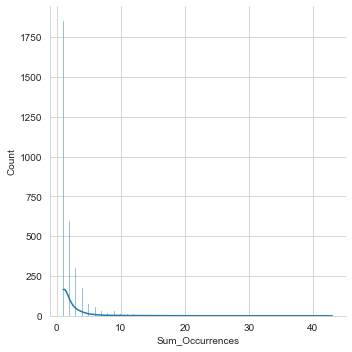

In [62]:
sns.displot(df_violent['Sum_Occurrences'],kde=True)

(array([2.448e+03, 2.980e+02, 2.490e+02, 5.800e+01, 2.800e+01, 4.700e+01,
        1.300e+01, 2.300e+01, 6.000e+00, 5.000e+00, 5.000e+00, 4.000e+00,
        7.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 2.000e+00]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ,
        16.4, 17.8, 19.2, 20.6, 22. , 23.4, 24.8, 26.2, 27.6, 29. , 30.4,
        31.8, 33.2, 34.6, 36. , 37.4, 38.8, 40.2, 41.6, 43. ]),
 <BarContainer object of 30 artists>)

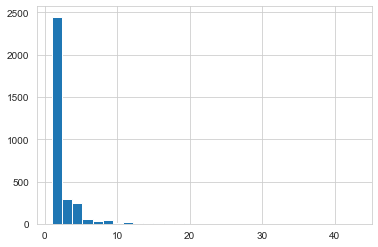

In [63]:
plt.hist(df_violent['Sum_Occurrences'],bins=30)

In [64]:

# Create empty lists to store model names and scores
model_names = []
train_scores = []
test_scores = []

# Evaluate models with r2
for name, model in models:
    pipe = Pipeline([
        ('preprocessing', preprocessor),
        ('model',TransformedTargetRegressor(regressor= model))
    ])
    pipe.fit(X_train, y_train)
    train_score = pipe.score(X_train, y_train)
    test_score = pipe.score(X_test, y_test)
    
    # Append results to lists
    model_names.append(name)
    train_scores.append(train_score)
    test_scores.append(test_score)

# Create DataFrame to display results
results_df = pd.DataFrame({'Model': model_names,
                           'Training Score': train_scores,
                           'Testing Score': test_scores})
                           
# Sort results by Testing Score in descending order
results_df = results_df.sort_values('Testing Score', ascending=False)

# Display results
print(results_df)


               Model  Training Score  Testing Score
5            XGBoost        0.960692       0.678492
6  Gradient Boosting        0.887725       0.676295
2      Random Forest        0.977815       0.651871
4        Extra Trees        1.000000       0.621419
3                SGD        0.474804       0.297268
0  Linear Regression        0.538161       0.263327
1        Elastic Net        0.159663       0.149753


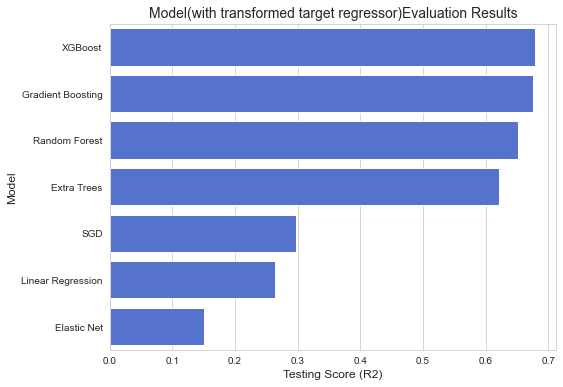

In [65]:
# Create bar chart
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.barplot(x='Testing Score', y='Model', data=results_df, color='royalblue')

# Add labels and title
plt.xlabel('Testing Score (R2)', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.title('Model(with transformed target regressor)Evaluation Results', fontsize=14)

# Show chart
plt.show()

## Optimizing best 3 models with Transformed Target Regressor

In [66]:
#optimizing best model-- random forest regressor with transformed Target regressor

# Define the best model pipeline
best_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', RandomForestRegressor())])
# Define the grid of hyperparameters to search over
param_grid = {'model__bootstrap': [True,False],
    #'model__max_depth': [80, 90, 100, 110],
    'model__max_features': ['sqrt'],
    #'model__min_samples_leaf': [2,3,4],
    #'model__min_samples_split': [3,4,5],
    'model__n_estimators': [500,600]
    }
# Define the transformed target regressor with grid search pipeline

best_grid_search_pipeline = TransformedTargetRegressor(regressor=GridSearchCV((best_pipeline), 
                                                                                             param_grid=param_grid, cv=5, n_jobs=-1, 
                                                                                             scoring='r2') )
# Train the model
best_grid_search_pipeline.fit(X_train, y_train.ravel())
# Evaluate the model on the test set
testscore = best_grid_search_pipeline.score(X_test, y_test.ravel())
trainscore= best_grid_search_pipeline.score(X_train, y_train.ravel())
print(f"Test score: {testscore:.3f}")
print(f"Train score:{trainscore:.3f}")
y_pred = best_grid_search_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Test RMSE:', rmse)


Test score: 0.626
Train score:0.972
Test RMSE: 1.553279876633725


In [67]:
best_params = best_grid_search_pipeline.regressor_.best_params_
print(best_params)


{'model__bootstrap': True, 'model__max_features': 'sqrt', 'model__n_estimators': 500}


In [68]:
# Define the best model pipeline-- XG boosting with transformed Target regressor
best_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', XGBRegressor())])
# Define the grid of hyperparameters to search over
param_grid = {"model__learning_rate"    : [0.05, 0.07,0.03 ] ,
 "model__max_depth"        : [7,8],
 "model__min_child_weight" : [ 5,7,8 ],
 "model__gamma"            : [0.4,0.7 ,0.8],
 "model__colsample_bytree" : [0.7,0.9,1.0 ] }
# Define the transformed target regressor with grid search pipeline

best_grid_search_pipeline_xgb = TransformedTargetRegressor(regressor=GridSearchCV((best_pipeline), 
                                                                                             param_grid=param_grid, cv=5, n_jobs=-1, 
                                                                                             scoring='r2') )
# Train the model
best_grid_search_pipeline_xgb.fit(X_train, y_train.ravel())
# Evaluate the model on the test set
testscore = best_grid_search_pipeline_xgb.score(X_test, y_test.ravel())
trainscore= best_grid_search_pipeline_xgb.score(X_train, y_train.ravel())
print(f"Test score: {testscore:.3f}")
print(f"Train score:{trainscore:.3f}")
y_pred = best_grid_search_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Test RMSE:', rmse)
best_params = best_grid_search_pipeline_xgb.regressor_.best_params_
print(best_params)

c:\Users\navne\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Test score: 0.698
Train score:0.897
Test RMSE: 1.553279876633725
{'model__colsample_bytree': 0.9, 'model__gamma': 0.7, 'model__learning_rate': 0.05, 'model__max_depth': 7, 'model__min_child_weight': 7}


In [69]:
# Define the best model pipeline--Gradient boosting with transformed Target regressor
best_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', GradientBoostingRegressor())])
# Define the grid of hyperparameters to search over
param_grid = param_grid = {
    #'model__min_samples_leaf': [2,3,4],
    #'model__min_samples_split': [3,5,6],
    'model__max_features': ['sqrt', 'log2'],
    "model__n_estimators":[500],
    "model__max_depth":[3,4,5],
    "model__learning_rate":[0.01,0.05,0.2],
    "model__alpha":[0.1,0.5],
    #'model__subsample':[0.85,0.9]
    }
# Define the transformed target regressor with grid search pipeline

best_grid_search_pipeline_gb = TransformedTargetRegressor(regressor=GridSearchCV((best_pipeline), 
                                                                                             param_grid=param_grid, cv=5, n_jobs=-1, 
                                                                                             scoring='r2') )
# Train the model
best_grid_search_pipeline_gb.fit(X_train, y_train.ravel())
# Evaluate the model on the test set
testscore = best_grid_search_pipeline_gb.score(X_test, y_test.ravel())
trainscore= best_grid_search_pipeline_gb.score(X_train, y_train.ravel())
print(f"Test score: {testscore:.3f}")
print(f"Train score:{trainscore:.3f}")
y_pred = best_grid_search_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print('Test RMSE:', rmse)
best_params = best_grid_search_pipeline_gb.regressor_.best_params_
print(best_params)

Test score: 0.659
Train score:0.923
Test RMSE: 1.553279876633725
{'model__alpha': 0.1, 'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__max_features': 'sqrt', 'model__n_estimators': 500}


## Feature Selection using RFECV

cross_val, mean r2 score:  -129302419673449.9 , same as RFECV score with all features
no of feat:  3
Optimal number of features : 3


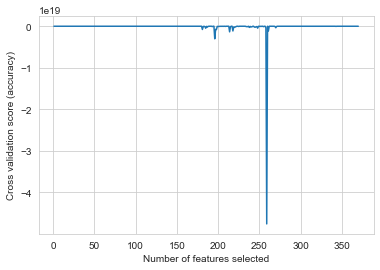

Test Score after feature Selection 0.2805091932621262
test RMSE with rfecv 1.553279876633725


In [70]:
#feature selection using recursive feature elimination cross validation
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score


class myestimator(TransformedTargetRegressor):

    def __init__(self,**kwargs):
        super().__init__()

    def fit(self, X, y, **kwargs):
        super().fit(X, y, **kwargs)  
        self.coef_ = self.regressor_.coef_
        return self
x_reg_dum = pd.get_dummies(X, drop_first=True)
estimator = myestimator(model=best_grid_search_pipeline_gb)
min_features_to_select=1
selector = RFECV(estimator, step=1, cv=3, scoring='r2')
selector = selector.fit(x_reg_dum, y)
#print("RFECV, r2 scores: ", np.round(selector.grid_scores_,2))
scores = cross_val_score(estimator, x_reg_dum, y, cv=5)
print("cross_val, mean r2 score: ", round(np.mean(scores),2), ", same as RFECV score with all features") 
print("no of feat: ", selector.n_features_ )
print("Optimal number of features : %d" %selector.n_features_)
mask = selector.support_
new_features = x_reg_dum.columns[mask]
#print(new_features)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(selector.cv_results_["mean_test_score"]) + min_features_to_select),
    selector.cv_results_["mean_test_score"],
)
plt.show()
Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split(x_reg_dum, y)
print("Test Score after feature Selection",selector.score(Xreg_test,yreg_test))
yreg_pred = selector.predict(Xreg_test)
reg_mse = mean_squared_error(yreg_test, yreg_pred)
reg_rmse = np.sqrt(mse)
print("test RMSE with rfecv",reg_rmse)

cross_val, mean r2 score:  -129302419673449.9 , same as RFECV score with all features
no of feat:  3
Optimal number of features : 3


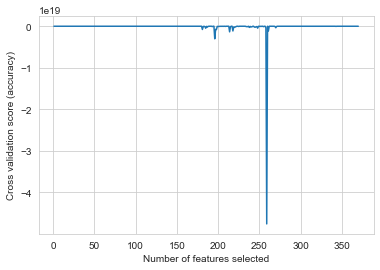

Test Score after feature Selection 0.32578957950888787
test RMSE with rfecv 1.553279876633725


In [71]:
#feature selection using recursive feature elimination cross validation
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score


class myestimator(TransformedTargetRegressor):

    def __init__(self,**kwargs):
        super().__init__()

    def fit(self, X, y, **kwargs):
        super().fit(X, y, **kwargs)  
        self.coef_ = self.regressor_.coef_
        return self
x_reg_dum = pd.get_dummies(X, drop_first=True)
estimator = myestimator(model=best_grid_search_pipeline_xgb)
min_features_to_select=1
selector = RFECV(estimator, step=1, cv=3, scoring='r2')
selector = selector.fit(x_reg_dum, y)
#print("RFECV, r2 scores: ", np.round(selector.grid_scores_,2))
scores = cross_val_score(estimator, x_reg_dum, y, cv=5)
print("cross_val, mean r2 score: ", round(np.mean(scores),2), ", same as RFECV score with all features") 
print("no of feat: ", selector.n_features_ )
print("Optimal number of features : %d" %selector.n_features_)
mask = selector.support_
new_features = x_reg_dum.columns[mask]
#print(new_features)
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(selector.cv_results_["mean_test_score"]) + min_features_to_select),
    selector.cv_results_["mean_test_score"],
)
plt.show()
Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split(x_reg_dum, y)
print("Test Score after feature Selection",selector.score(Xreg_test,yreg_test))
yreg_pred = selector.predict(Xreg_test)
reg_mse = mean_squared_error(yreg_test, yreg_pred)
reg_rmse = np.sqrt(mse)
print("test RMSE with rfecv",reg_rmse)

## Feature Selection Using Embeded Method

Violation_Type_Sexual Assaults          0.154637
Violation_Type_Robbery                  0.150114
Permanently U                           0.143586
Neighbourhood Name_DOWNTOWN             0.083515
Income_Less than $30,                   0.076333
Violation_Type_Homicide                 0.042508
Neighbourhood Name_GOODRIDGE CORNERS    0.033845
Income_$100,000 to le                   0.031576
Preschool                               0.027835
Gr10_Gr12                               0.022139
Kindergarten                            0.013231
Reported_Month_February                 0.013105
Gr7_Gr9                                 0.011021
Post_Secondary                          0.010588
Reported_Month_January                  0.009696
Reported_Month_June                     0.009500
Reported_Month_May                      0.009310
QRT_Q2                                  0.008319
Reported_Month_July                     0.007876
Reported_Month_March                    0.007432
Income_$60,000 to le

<AxesSubplot:>

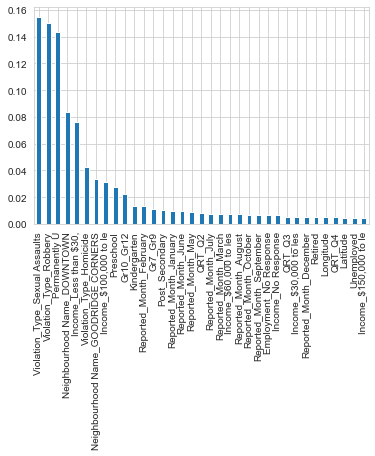

In [72]:
#Embeded Method
randFor = RandomForestRegressor()
x_reg_dum = pd.get_dummies(X, drop_first=True)
x_reg_dum=pd.DataFrame(x_reg_dum)
y_=pd.Series.to_frame(y)
randFor.fit(x_reg_dum,y)
feat_names = x_reg_dum.columns
for_imp = randFor.feature_importances_
forest_imp = pd.Series(for_imp, index=feat_names)
# sort the feature importances in descending order
features_sorted = forest_imp.sort_values(ascending=False)

# print the top 25 important features
top15features=features_sorted[:35]
print(features_sorted[:35])
top15features.plot(kind='bar')

## Feature Selection using K-best

In [73]:
#100 best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_regression

# K best - broken out
kb = SelectKBest(score_func=mutual_info_regression, k=100)
kb2 = kb.fit(x_reg_dum,y)
post_c2 = kb2.transform(x_reg_dum)
print("K-Best:", post_c2.shape)

#Print the features
mask = kb2.get_support()
new_features = x_reg_dum.columns[mask]
print("K-Best Features:", new_features)

K-Best: (3217, 100)
K-Best Features: Index(['Latitude', 'Longitude', 'Preschool', 'Kindergarten', 'Gr7_Gr9',
       'Gr10_Gr12', 'Post_Secondary', 'Homemaker', 'Employedage0-30',
       'Employed 30+ ', 'Unemployed', 'Retired', 'Permanently U',
       'Employment_No Response', 'Income_Less than $30,',
       'Income_$30,000 to les', 'Income_$60,000 to les',
       'Income_$100,000 to le', 'Income_$125,000 to le',
       'Income_$150,000 to le', 'Income_$200,000 to le',
       'Income_$250,000 or mo', 'Income_No Response',
       'Neighbourhood Name_ALBANY', 'Neighbourhood Name_ALBERTA AVENUE',
       'Neighbourhood Name_ALBERTA PARK INDUSTRIAL',
       'Neighbourhood Name_AMBLESIDE',
       'Neighbourhood Name_ANTHONY HENDAY SOUTH',
       'Neighbourhood Name_ANTHONY HENDAY SOUTH WEST',
       'Neighbourhood Name_ATHLONE', 'Neighbourhood Name_AVONMORE',
       'Neighbourhood Name_BANNERMAN', 'Neighbourhood Name_BELMONT',
       'Neighbourhood Name_BEVERLY HEIGHTS', 'Neighbourhood Name_